In [3]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device:', device)

device: cpu


In [9]:
# data
training_parameters = {
    "n_epochs": 100,
    "batch_size": 100,
}
data_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,))
                    ])),
    batch_size=training_parameters["batch_size"],
    shuffle=True
)

0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...


/usr0/home/jingbow/miniconda3/envs/10708/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


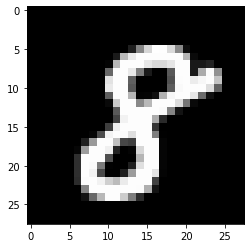

In [10]:
# preview an image
%matplotlib inline 
from matplotlib import pyplot as plt

for x,_ in data_loader:
    plt.imshow(x.numpy()[0][0], cmap='gray')
    break

In [17]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        feature_size = 10
        noise_size = 100
        input_dim = noise_size + feature_size
        output_dim = 784
        self.label_embedding = nn.Embedding(10, 10)
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        self.output_layer = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x,c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.output_layer(output)
        return output.to(device)
    

class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        image_size = 784
        feature_size = 10
        input_dim = image_size + feature_size
        output_dim = 1
        self.label_embedding = nn.Embedding(10, 10)
        
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.output_layer = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x, c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.output_layer(output)
        return output.to(device)

In [18]:
discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

loss = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

[0/100]: loss_d: 0.506, loss_g: 2.362
[1/100]: loss_d: 0.558, loss_g: 2.077
[2/100]: loss_d: 0.557, loss_g: 1.368
[3/100]: loss_d: 0.315, loss_g: 3.192
[4/100]: loss_d: 0.343, loss_g: 2.679
[5/100]: loss_d: 0.308, loss_g: 2.552
[6/100]: loss_d: 0.260, loss_g: 2.901
[7/100]: loss_d: 0.282, loss_g: 2.825
[8/100]: loss_d: 0.252, loss_g: 2.949
Training Steps Completed:  499
6


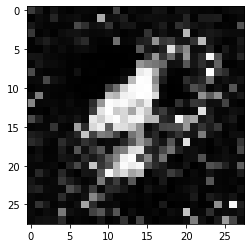

[9/100]: loss_d: 0.289, loss_g: 2.684
[10/100]: loss_d: 0.309, loss_g: 2.529
[11/100]: loss_d: 0.360, loss_g: 2.200
[12/100]: loss_d: 0.340, loss_g: 2.245
[13/100]: loss_d: 0.351, loss_g: 2.243
[14/100]: loss_d: 0.388, loss_g: 2.039
[15/100]: loss_d: 0.380, loss_g: 2.114
[16/100]: loss_d: 0.395, loss_g: 1.956
[17/100]: loss_d: 0.415, loss_g: 1.862
[18/100]: loss_d: 0.433, loss_g: 1.772
Training Steps Completed:  499
7


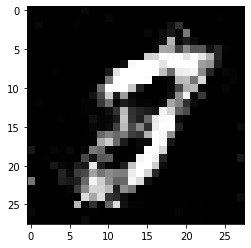

[19/100]: loss_d: 0.436, loss_g: 1.718
[20/100]: loss_d: 0.432, loss_g: 1.768
[21/100]: loss_d: 0.457, loss_g: 1.610
[22/100]: loss_d: 0.482, loss_g: 1.525
[23/100]: loss_d: 0.467, loss_g: 1.596
[24/100]: loss_d: 0.492, loss_g: 1.479
[25/100]: loss_d: 0.496, loss_g: 1.443
[26/100]: loss_d: 0.506, loss_g: 1.405
[27/100]: loss_d: 0.509, loss_g: 1.398
[28/100]: loss_d: 0.519, loss_g: 1.362
Training Steps Completed:  499
0


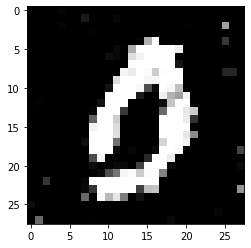

[29/100]: loss_d: 0.509, loss_g: 1.394
[30/100]: loss_d: 0.524, loss_g: 1.328
[31/100]: loss_d: 0.528, loss_g: 1.323
[32/100]: loss_d: 0.538, loss_g: 1.283
[33/100]: loss_d: 0.542, loss_g: 1.267
[34/100]: loss_d: 0.557, loss_g: 1.189
[35/100]: loss_d: 0.559, loss_g: 1.193
[36/100]: loss_d: 0.561, loss_g: 1.169
[37/100]: loss_d: 0.562, loss_g: 1.181
[38/100]: loss_d: 0.568, loss_g: 1.149
Training Steps Completed:  499
4


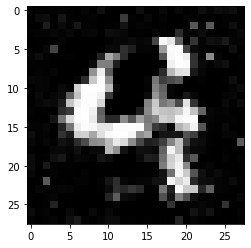

[39/100]: loss_d: 0.563, loss_g: 1.182
[40/100]: loss_d: 0.573, loss_g: 1.122
[41/100]: loss_d: 0.577, loss_g: 1.122
[42/100]: loss_d: 0.570, loss_g: 1.141
[43/100]: loss_d: 0.583, loss_g: 1.094
[44/100]: loss_d: 0.588, loss_g: 1.074
[45/100]: loss_d: 0.583, loss_g: 1.092
[46/100]: loss_d: 0.585, loss_g: 1.088
[47/100]: loss_d: 0.596, loss_g: 1.046
[48/100]: loss_d: 0.595, loss_g: 1.040
Training Steps Completed:  499
5


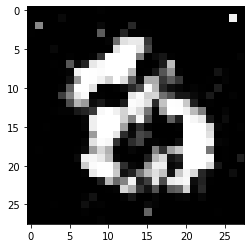

[49/100]: loss_d: 0.594, loss_g: 1.049
[50/100]: loss_d: 0.597, loss_g: 1.035
[51/100]: loss_d: 0.604, loss_g: 1.023
[52/100]: loss_d: 0.598, loss_g: 1.038
[53/100]: loss_d: 0.608, loss_g: 0.996
[54/100]: loss_d: 0.612, loss_g: 0.986
[55/100]: loss_d: 0.602, loss_g: 1.025
[56/100]: loss_d: 0.603, loss_g: 1.031
[57/100]: loss_d: 0.610, loss_g: 0.999
[58/100]: loss_d: 0.615, loss_g: 0.966
Training Steps Completed:  499
1


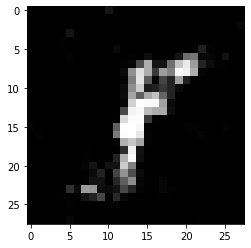

[59/100]: loss_d: 0.617, loss_g: 0.963
[60/100]: loss_d: 0.622, loss_g: 0.952
[61/100]: loss_d: 0.615, loss_g: 0.988
[62/100]: loss_d: 0.612, loss_g: 0.987
[63/100]: loss_d: 0.615, loss_g: 0.974
[64/100]: loss_d: 0.616, loss_g: 0.965
[65/100]: loss_d: 0.621, loss_g: 0.954
[66/100]: loss_d: 0.620, loss_g: 0.956
[67/100]: loss_d: 0.621, loss_g: 0.969
[68/100]: loss_d: 0.622, loss_g: 0.948
Training Steps Completed:  499
3


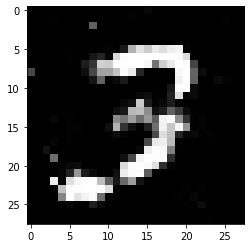

[69/100]: loss_d: 0.623, loss_g: 0.944
[70/100]: loss_d: 0.627, loss_g: 0.931
[71/100]: loss_d: 0.629, loss_g: 0.925
[72/100]: loss_d: 0.633, loss_g: 0.919
[73/100]: loss_d: 0.631, loss_g: 0.919
[74/100]: loss_d: 0.630, loss_g: 0.928
[75/100]: loss_d: 0.627, loss_g: 0.929
[76/100]: loss_d: 0.634, loss_g: 0.915
[77/100]: loss_d: 0.629, loss_g: 0.943
[78/100]: loss_d: 0.629, loss_g: 0.931
Training Steps Completed:  499
9


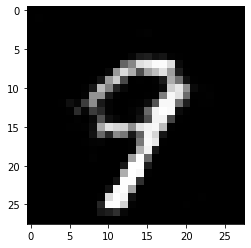

[79/100]: loss_d: 0.632, loss_g: 0.915
[80/100]: loss_d: 0.638, loss_g: 0.898
[81/100]: loss_d: 0.635, loss_g: 0.903
[82/100]: loss_d: 0.638, loss_g: 0.906
[83/100]: loss_d: 0.636, loss_g: 0.904
[84/100]: loss_d: 0.639, loss_g: 0.887
[85/100]: loss_d: 0.643, loss_g: 0.871
[86/100]: loss_d: 0.642, loss_g: 0.885
[87/100]: loss_d: 0.639, loss_g: 0.901
[88/100]: loss_d: 0.638, loss_g: 0.893
Training Steps Completed:  499
1


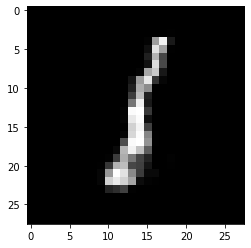

[89/100]: loss_d: 0.635, loss_g: 0.904
[90/100]: loss_d: 0.636, loss_g: 0.903
[91/100]: loss_d: 0.640, loss_g: 0.881
[92/100]: loss_d: 0.644, loss_g: 0.874
[93/100]: loss_d: 0.642, loss_g: 0.878
[94/100]: loss_d: 0.645, loss_g: 0.873
[95/100]: loss_d: 0.646, loss_g: 0.871
[96/100]: loss_d: 0.645, loss_g: 0.864
[97/100]: loss_d: 0.640, loss_g: 0.886
[98/100]: loss_d: 0.644, loss_g: 0.871
Training Steps Completed:  499
0


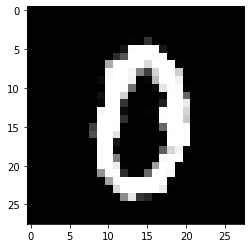

[99/100]: loss_d: 0.643, loss_g: 0.884


In [19]:
batch_size = training_parameters["batch_size"]
n_epochs = training_parameters["n_epochs"]

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(data_loader):
        '''
        training for discriminator
        '''
        # Generate noise and move it the device
        noise = torch.randn(batch_size, 100).to(device)
        fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
        # Forward pass for the fake and real images
        generated_data = generator(noise, fake_labels) # batch_size X 784
        true_data = data_input[0].view(batch_size, 784).to(device) # batch_size X 784
        digit_labels = data_input[1] # batch_size
        true_labels = torch.ones(batch_size).to(device) # all 1s
        
        # Clear optimizer gradients        
        discriminator_optimizer.zero_grad()
        # Forward pass with true data as input
        discriminator_output_for_true_data = discriminator(true_data, digit_labels).view(batch_size)
        # Compute Loss
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)
        # Forward pass with generated data as input
        discriminator_output_for_generated_data = discriminator(generated_data.detach(), fake_labels).view(batch_size)
        # Compute Loss 
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(batch_size).to(device)
        )
        # Average the loss
        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2
               
        # Backpropagate the losses for Discriminator model      
        discriminator_loss.backward()
        discriminator_optimizer.step()
        D_loss.append(discriminator_loss.data.item())
        
        '''
        training for generator
        '''
        # Clear optimizer gradients
        generator_optimizer.zero_grad()
        # generate the data again
        generated_data = generator(noise, fake_labels) # batch_size X 784
        # Forward pass with the generated data
        discriminator_output_on_generated_data = discriminator(generated_data, fake_labels).view(batch_size)
        # Compute loss
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        # Backpropagate losses for Generator model.
        generator_loss.backward()
        generator_optimizer.step()
        G_loss.append(generator_loss.data.item())
        
        # Evaluate the model
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            with torch.no_grad():
                noise = torch.randn(batch_size,100).to(device)
                fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
                generated_data = generator(noise, fake_labels).cpu().view(batch_size, 28, 28)
                for x in generated_data:
                    print(fake_labels[0].item())
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()
                    break

    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))
